In [2]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbPipeline
from scipy.stats import skew


import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the CSV files

case_data_4Yrs = pd.read_csv('1yr_Case_Data.csv')
control_data_4Yrs = pd.read_csv('1yr_Control_Data.csv')

In [4]:
# Check the number of unique PATID values in each DataFrame
print("Number of unique PATID values in case_data:", case_data['PATID'].nunique())
print("Number of unique PATID values in control_data:", control_data['PATID'].nunique())


Number of unique PATID values in case_data: 2591
Number of unique PATID values in control_data: 119723


In [5]:
# Concatenate the two datasets along the rows
data = pd.concat([case_data, control_data], ignore_index=True)

# Print the combined DataFrame info to verify the changes
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122314 entries, 0 to 122313
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PATID           122314 non-null  int64  
 1   Sex             122314 non-null  object 
 2   Race            122310 non-null  object 
 3   Marital_Status  122303 non-null  object 
 4   Max_DBP         122282 non-null  float64
 5   Max_SBP         122294 non-null  float64
 6   Min_DBP         122282 non-null  float64
 7   Min_SBP         122294 non-null  float64
 8   Comorbidities   121973 non-null  object 
 9   Smoking_Status  122091 non-null  object 
 10  Encounter Type  122314 non-null  object 
 11  Age_Grp         122314 non-null  object 
 12  Target          122314 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 12.1+ MB
None
     PATID Sex   Race Marital_Status  Max_DBP  Max_SBP  Min_DBP  Min_SBP  \
0  2370058   F  WHITE        Widowed    114.0    192.0 

In [6]:
# Find the number of missing values per column
data.isnull().sum(axis=0)
print(data.isnull().sum(axis=0))

PATID               0
Sex                 0
Race                4
Marital_Status     11
Max_DBP            32
Max_SBP            20
Min_DBP            32
Min_SBP            20
Comorbidities     341
Smoking_Status    223
Encounter Type      0
Age_Grp             0
Target              0
dtype: int64


# Check for Symmetry and skewness to decide whether to use the mean, median or mode for imputing missing values in numerical data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122314 entries, 0 to 122313
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PATID           122314 non-null  int64  
 1   Sex             122314 non-null  object 
 2   Race            122310 non-null  object 
 3   Marital_Status  122303 non-null  object 
 4   Max_DBP         122282 non-null  float64
 5   Max_SBP         122294 non-null  float64
 6   Min_DBP         122282 non-null  float64
 7   Min_SBP         122294 non-null  float64
 8   Comorbidities   121973 non-null  object 
 9   Smoking_Status  122091 non-null  object 
 10  Encounter Type  122314 non-null  object 
 11  Age_Grp         122314 non-null  object 
 12  Target          122314 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 12.1+ MB


In [8]:
# Check the number of missing values in each column
missing_values_after_imputation = data.isnull().sum()

# Calculate the percentage of missing values in each column
percentage_missing = (missing_values_after_imputation / len(data)) * 100

# Print the number of missing values and their percentage
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values_after_imputation,
    'Percentage Missing': percentage_missing
})


print(missing_data_summary)

                Missing Values  Percentage Missing
PATID                        0            0.000000
Sex                          0            0.000000
Race                         4            0.003270
Marital_Status              11            0.008993
Max_DBP                     32            0.026162
Max_SBP                     20            0.016351
Min_DBP                     32            0.026162
Min_SBP                     20            0.016351
Comorbidities              341            0.278791
Smoking_Status             223            0.182318
Encounter Type               0            0.000000
Age_Grp                      0            0.000000
Target                       0            0.000000


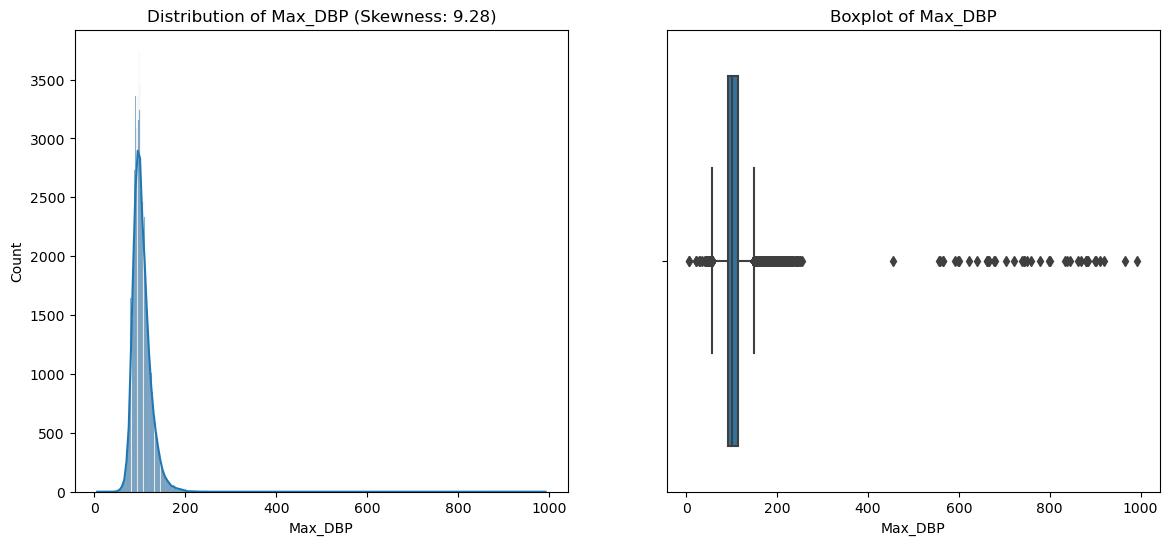

Max_DBP: Distribution is skewed or has outliers. Impute missing values with median.


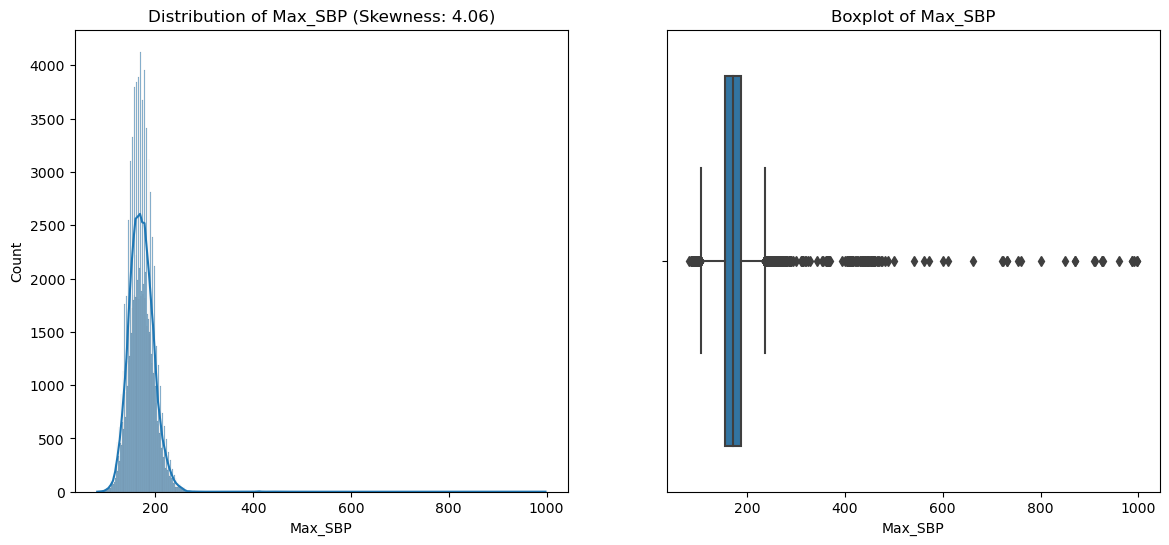

Max_SBP: Distribution is skewed or has outliers. Impute missing values with median.


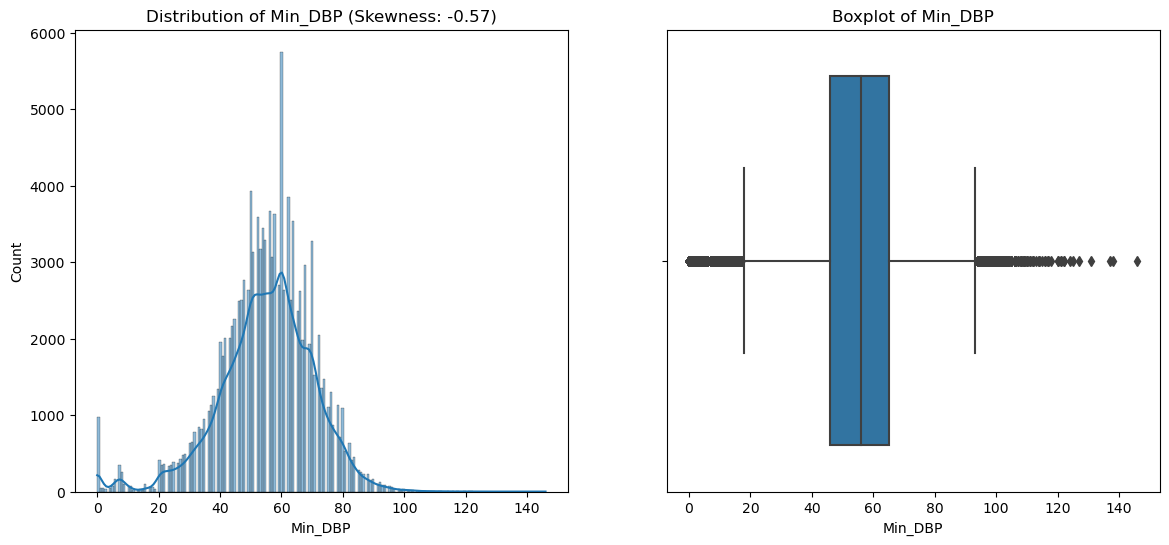

Min_DBP: Distribution is skewed or has outliers. Impute missing values with median.


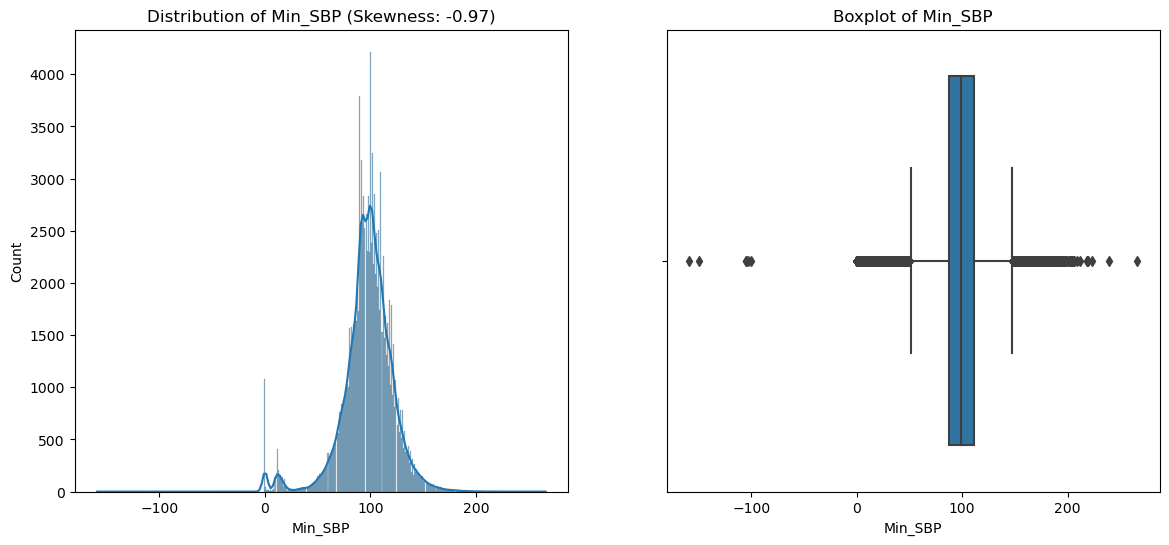

Min_SBP: Distribution is skewed or has outliers. Impute missing values with median.


In [9]:
# Define the numerical columns
numerical_columns = ['Max_DBP', 'Max_SBP', 'Min_DBP', 'Min_SBP']

for column in numerical_columns:
    # Calculate the column skewness
    column_skewness = skew(data[column].dropna())
    
    # Plot the distribution and a boxplot
    plt.figure(figsize=(14, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column].dropna(), kde=True)
    plt.title(f'Distribution of {column} (Skewness: {column_skewness:.2f})')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    
    # Save the plot before showing it
    plt.savefig(f'{column}_distribution_boxplot.png')
    
    
    plt.show()

    # Decide whether to use mean or median
    if abs(column_skewness) < 0.5:
        print(f"{column}: Distribution is fairly symmetric. Impute missing values with mean.")
    else:
        print(f"{column}: Distribution is skewed or has outliers. Impute missing values with median.")


# Impute missing values for the numerical features

In [10]:
# Impute missing values with median for skewed distributions or columns with outliers

data['Max_DBP'].fillna(data['Max_DBP'].median(), inplace=True)
data['Max_SBP'].fillna(data['Max_SBP'].median(), inplace=True)
data['Min_SBP'].fillna(data['Min_SBP'].median(), inplace=True)
data['Min_DBP'].fillna(data['Min_DBP'].median(), inplace=True)

In [11]:
# Check the number of missing values in each column
missing_values_after_imputation = data.isnull().sum()
missing_values_after_imputation

PATID               0
Sex                 0
Race                4
Marital_Status     11
Max_DBP             0
Max_SBP             0
Min_DBP             0
Min_SBP             0
Comorbidities     341
Smoking_Status    223
Encounter Type      0
Age_Grp             0
Target              0
dtype: int64

# Mapping and Encoding Diastolic Blood Pressure (DBP), and Systolic Blood Pressure (SBP)

In [12]:
# Create SBP and DBP categories with desired labels
data['SBP_Category'] = pd.cut(data['Max_SBP'], bins=[-float('inf'), 120, 140, float('inf')], labels=['SBP <=120', 'SBP 120-140', 'SBP >=140'])
data['DBP_Category'] = pd.cut(data['Max_DBP'], bins=[-float('inf'), 80, 90, float('inf')], labels=['DBP <=80', 'DBP 80-90', 'DBP >=90'])

# One-hot encoding
data = pd.get_dummies(data, columns=['SBP_Category', 'DBP_Category'])

# Rename the columns to match the format
data = data.rename(columns={
    'SBP_Category_SBP <=120': 'SBP below 120',
    'SBP_Category_SBP 120-140': 'SBP 120-140',
    'SBP_Category_SBP >=140': 'SBP above 140',
    'DBP_Category_DBP <=80': 'DBP below 80',
    'DBP_Category_DBP 80-90': 'DBP 80-90',
    'DBP_Category_DBP >=90': 'DBP above 90'
})

# Remove the original columns
data = data.drop(columns=['Max_SBP', 'Min_SBP', 'Max_DBP', 'Min_DBP'])

# Display the resulting dataframe
print(data.head())

# Check and print the count for each category
print("Count for each SBP category:")
print(f"SBP below 120: {data['SBP below 120'].sum()}")
print(f"SBP 120-140: {data['SBP 120-140'].sum()}")
print(f"SBP above 140: {data['SBP above 140'].sum()}")

print("\nCount for each DBP category:")
print(f"DBP below 80: {data['DBP below 80'].sum()}")
print(f"DBP 80-90: {data['DBP 80-90'].sum()}")
print(f"DBP above 90: {data['DBP above 90'].sum()}")


     PATID Sex   Race Marital_Status  \
0  2370058   F  WHITE        Widowed   
1  2459455   M  WHITE        Married   
2  2516556   F  WHITE        Widowed   
3  2335038   M  WHITE        Married   
4  2524377   F  WHITE        Widowed   

                                       Comorbidities  \
0  Morbid (severe) obesity due to excess calories...   
1  HYPERTENSION NOS,Essential (primary) hypertens...   
2                                                NaN   
3  Essential (primary) hypertension-I10,HYPERLIPI...   
4                                  ANXIETY STATE NOS   

                             Smoking_Status                  Encounter Type  \
0                  Current every day smoker  EMERGENCY,OUTPATIENT,INPATIENT   
1  Former smoker quit longer than 12 months  EMERGENCY,OUTPATIENT,INPATIENT   
2                              Never smoker  OUTPATIENT,EMERGENCY,INPATIENT   
3                  Current every day smoker  OUTPATIENT,EMERGENCY,INPATIENT   
4                          

In [13]:
# Check the number of missing values
missing_values = data.isnull().sum()

# Calculate the percentage of missing values in each column
percentage_missing = (missing_values / len(data)) * 100

# Print the number of missing values and their percentage
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': percentage_missing
})


print(missing_data_summary)


                Missing Values  Percentage Missing
PATID                        0            0.000000
Sex                          0            0.000000
Race                         4            0.003270
Marital_Status              11            0.008993
Comorbidities              341            0.278791
Smoking_Status             223            0.182318
Encounter Type               0            0.000000
Age_Grp                      0            0.000000
Target                       0            0.000000
SBP below 120                0            0.000000
SBP 120-140                  0            0.000000
SBP above 140                0            0.000000
DBP below 80                 0            0.000000
DBP 80-90                    0            0.000000
DBP above 90                 0            0.000000


# Mapping and Encoding

# 1. Encoding 'Age' column

In [14]:
# One hot encoding on the 'Age_Grp' column
age_group_dummies = pd.get_dummies(data['Age_Grp'], prefix='Age_Grp')

# Concatenate the original DataFrame with the new one hot encoded columns
data = pd.concat([data, age_group_dummies], axis=1)

In [15]:
data.head()

,PATID,Sex,Race,Marital_Status,Comorbidities,Smoking_Status,Encounter Type,Age_Grp,Target,SBP below 120,SBP 120-140,SBP above 140,DBP below 80,DBP 80-90,DBP above 90,Age_Grp_50-60,Age_Grp_60-70,Age_Grp_70-80,Age_Grp_80-90,Age_Grp_90-100
0,2370058,F,WHITE,Widowed,Morbid (severe) obesity due to excess calories...,Current every day smoker,"EMERGENCY,OUTPATIENT,INPATIENT",80-90,1,0,0,1,0,0,1,0,0,0,1,0
1,2459455,M,WHITE,Married,"HYPERTENSION NOS,Essential (primary) hypertens...",Former smoker quit longer than 12 months,"EMERGENCY,OUTPATIENT,INPATIENT",70-80,1,0,0,1,0,0,1,0,0,1,0,0
2,2516556,F,WHITE,Widowed,NaN,Never smoker,"OUTPATIENT,EMERGENCY,INPATIENT",80-90,1,0,0,1,0,0,1,0,0,0,1,0
3,2335038,M,WHITE,Married,"Essential (primary) hypertension-I10,HYPERLIPI...",Current every day smoker,"OUTPATIENT,EMERGENCY,INPATIENT",70-80,1,0,0,1,0,0,1,0,0,1,0,0
4,2524377,F,WHITE,Widowed,ANXIETY STATE NOS,NaN,"INPATIENT,EMERGENCY,OUTPATIENT",80-90,1,0,0,1,0,0,1,0,0,0,1,0


In [16]:
# Drop the original 'Age_Group' column
data = data.drop(columns=['Age_Grp'])

# Display the DataFrame
#print("DataFrame with One Hot Encoding:")
print(data.head())
data.info()

     PATID Sex   Race Marital_Status  \
0  2370058   F  WHITE        Widowed   
1  2459455   M  WHITE        Married   
2  2516556   F  WHITE        Widowed   
3  2335038   M  WHITE        Married   
4  2524377   F  WHITE        Widowed   

                                       Comorbidities  \
0  Morbid (severe) obesity due to excess calories...   
1  HYPERTENSION NOS,Essential (primary) hypertens...   
2                                                NaN   
3  Essential (primary) hypertension-I10,HYPERLIPI...   
4                                  ANXIETY STATE NOS   

                             Smoking_Status                  Encounter Type  \
0                  Current every day smoker  EMERGENCY,OUTPATIENT,INPATIENT   
1  Former smoker quit longer than 12 months  EMERGENCY,OUTPATIENT,INPATIENT   
2                              Never smoker  OUTPATIENT,EMERGENCY,INPATIENT   
3                  Current every day smoker  OUTPATIENT,EMERGENCY,INPATIENT   
4                          

In [17]:
# Print initial count

initial_count = data['Age_Grp_90-100'].value_counts(dropna=False)
print("Initial value counts for 'Age_Grp_90-100:")
print(initial_count)

Initial value counts for 'Age_Grp_90-100:
0    107229
1     15085
Name: Age_Grp_90-100, dtype: int64


In [18]:
# Print initial count
initial_count = data['Age_Grp_80-90'].value_counts(dropna=False)
print("Initial value counts for 'Age_Grp_80-90:")
print(initial_count)

Initial value counts for 'Age_Grp_80-90:
0    94612
1    27702
Name: Age_Grp_80-90, dtype: int64


In [19]:
# Print initial count
initial_count = data['Age_Grp_70-80'].value_counts(dropna=False)
print("Initial value counts for 'Age_Grp_70-80:")
print(initial_count)

Initial value counts for 'Age_Grp_70-80:
0    82857
1    39457
Name: Age_Grp_70-80, dtype: int64


In [20]:
# Print initial count
initial_count = data['Age_Grp_60-70'].value_counts(dropna=False)
print("Initial value counts for 'Age_Grp_60-70:")
print(initial_count)

Initial value counts for 'Age_Grp_60-70:
0    85719
1    36595
Name: Age_Grp_60-70, dtype: int64


In [21]:
# Print initial count
initial_count = data['Age_Grp_50-60'].value_counts(dropna=False)
print("Initial value counts for 'Age_Grp_50-60:")
print(initial_count)

Initial value counts for 'Age_Grp_50-60:
0    118839
1      3475
Name: Age_Grp_50-60, dtype: int64


# 2. Imputation, Mapping and Encoding for 'Smoking_Status' column 

In [22]:
# Print initial count
initial_count = data['Smoking_Status'].value_counts(dropna=False)
print("Initial value counts for 'Smoking_Status' column:")
print(initial_count)

Initial value counts for 'Smoking_Status' column:
Never smoker                                51239
Former smoker quit longer than 12 months    35745
Current every day smoker                    31201
Current some day smoker                      1967
Former smoker quit within 12 months          1466
Light tobacco smoker                          291
NaN                                           223
Heavy tobacco smoker                          120
Smoker ###                                     62
Name: Smoking_Status, dtype: int64


In [23]:
# Impute missing values in the 'Smoking_Status' column

data['Smoking_Status'].fillna(data['Smoking_Status'].mode()[0], inplace=True)  

# Verify the changes after imputation
print("\nValue counts for 'Smoking_Status' column after imputation:")
print(data['Smoking_Status'].value_counts(dropna=False))


Value counts for 'Smoking_Status' column after imputation:
Never smoker                                51462
Former smoker quit longer than 12 months    35745
Current every day smoker                    31201
Current some day smoker                      1967
Former smoker quit within 12 months          1466
Light tobacco smoker                          291
Heavy tobacco smoker                          120
Smoker ###                                     62
Name: Smoking_Status, dtype: int64


# Define the Mapping Function

In [24]:
# Normalize and clean the string values in 'Smoking_Status'
data['Smoking_Status'] = data['Smoking_Status'].str.replace('#', '').str.strip()

In [26]:
# Define the mapping for encoding
smoking_status_mapping = {
    'Never smoker': 0,
    'Former smoker quit longer than 12 months': 1,
    'Former smoker quit within 12 months': 1,
    'Light tobacco smoker': 1,
    'Current some day smoker': 1,
    'Current every day smoker': 1,
    'Smoker': 1,
    'Heavy tobacco smoker': 1
}

In [27]:
data['Smoking_Status'] = data['Smoking_Status'].map(smoking_status_mapping)

print(data)

          PATID Sex   Race Marital_Status  \
0       2370058   F  WHITE        Widowed   
1       2459455   M  WHITE        Married   
2       2516556   F  WHITE        Widowed   
3       2335038   M  WHITE        Married   
4       2524377   F  WHITE        Widowed   
...         ...  ..    ...            ...   
122309  2633300   F  WHITE       Divorced   
122310  1575030   F  WHITE        Married   
122311  2940185   M  WHITE        Married   
122312  1210750   M  WHITE         Single   
122313  2430126   M  WHITE        Married   

                                            Comorbidities  Smoking_Status  \
0       Morbid (severe) obesity due to excess calories...               1   
1       HYPERTENSION NOS,Essential (primary) hypertens...               1   
2                                                     NaN               0   
3       Essential (primary) hypertension-I10,HYPERLIPI...               1   
4                                       ANXIETY STATE NOS               0 

In [28]:
# Check the counts after encoding
encoded_counts = data['Smoking_Status'].value_counts()

print(encoded_counts)

1    70852
0    51462
Name: Smoking_Status, dtype: int64


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122314 entries, 0 to 122313
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PATID           122314 non-null  int64 
 1   Sex             122314 non-null  object
 2   Race            122310 non-null  object
 3   Marital_Status  122303 non-null  object
 4   Comorbidities   121973 non-null  object
 5   Smoking_Status  122314 non-null  int64 
 6   Encounter Type  122314 non-null  object
 7   Target          122314 non-null  int64 
 8   SBP below 120   122314 non-null  uint8 
 9   SBP 120-140     122314 non-null  uint8 
 10  SBP above 140   122314 non-null  uint8 
 11  DBP below 80    122314 non-null  uint8 
 12  DBP 80-90       122314 non-null  uint8 
 13  DBP above 90    122314 non-null  uint8 
 14  Age_Grp_50-60   122314 non-null  uint8 
 15  Age_Grp_60-70   122314 non-null  uint8 
 16  Age_Grp_70-80   122314 non-null  uint8 
 17  Age_Grp_80-90   122314 non-nu

# 3. Mapping and Encoding 'Sex' column

In [30]:
# Check unique values in the 'Sex' column
unique_Sex_Status = data['Sex'].unique()
print(unique_Sex_Status)

# Verify the new columns and their unique values
print(data[['Sex']].head())
print(data['Sex'].value_counts(dropna=False)) 

['F' 'M']
  Sex
0   F
1   M
2   F
3   M
4   F
F    65618
M    56696
Name: Sex, dtype: int64


In [31]:
# Apply one-hot encoding to the 'Sex' column
data = pd.get_dummies(data, columns=['Sex'], dummy_na=False)

In [32]:
# # Verify the one-hot encoded DataFrame
# print(data.head())
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122314 entries, 0 to 122313
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PATID           122314 non-null  int64 
 1   Race            122310 non-null  object
 2   Marital_Status  122303 non-null  object
 3   Comorbidities   121973 non-null  object
 4   Smoking_Status  122314 non-null  int64 
 5   Encounter Type  122314 non-null  object
 6   Target          122314 non-null  int64 
 7   SBP below 120   122314 non-null  uint8 
 8   SBP 120-140     122314 non-null  uint8 
 9   SBP above 140   122314 non-null  uint8 
 10  DBP below 80    122314 non-null  uint8 
 11  DBP 80-90       122314 non-null  uint8 
 12  DBP above 90    122314 non-null  uint8 
 13  Age_Grp_50-60   122314 non-null  uint8 
 14  Age_Grp_60-70   122314 non-null  uint8 
 15  Age_Grp_70-80   122314 non-null  uint8 
 16  Age_Grp_80-90   122314 non-null  uint8 
 17  Age_Grp_90-100  122314 non-nu

# 4. Imputation, Mapping and Encoding for 'Race' column

In [33]:
# Check unique values in the 'Race' column
print(data['Race'].value_counts(dropna=False)) 

WHITE                                      112011
BLACK OR AFRICAN AMERICAN                    7393
SOME OTHER RACE                              1121
ASIAN                                        1071
Unknown                                       455
AMERICAN INDIAN OR ALASKAN NATIVE             210
NATIVE HAWAIIAN OR OTHER PACIFIC ISLAND        49
NaN                                             4
Name: Race, dtype: int64


In [34]:
# Replace 'Unknown' with NaN
data['Race'] = data['Race'].replace('Unknown', np.nan)

# Verify the changes
print("Value counts for 'Race' column after replacing 'Unknown' with NaN:")
print(data['Race'].value_counts(dropna=False))

Value counts for 'Race' column after replacing 'Unknown' with NaN:
WHITE                                      112011
BLACK OR AFRICAN AMERICAN                    7393
SOME OTHER RACE                              1121
ASIAN                                        1071
NaN                                           459
AMERICAN INDIAN OR ALASKAN NATIVE             210
NATIVE HAWAIIAN OR OTHER PACIFIC ISLAND        49
Name: Race, dtype: int64


In [35]:
# Check the number of missing values in each column
missing_values = data.isnull().sum()

# Calculate the percentage of missing values in each column
percentage_missing = (missing_values / len(data)) * 100

# Print the number of missing values and their percentage
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': percentage_missing
})

print(missing_data_summary)

                Missing Values  Percentage Missing
PATID                        0            0.000000
Race                       459            0.375264
Marital_Status              11            0.008993
Comorbidities              341            0.278791
Smoking_Status               0            0.000000
Encounter Type               0            0.000000
Target                       0            0.000000
SBP below 120                0            0.000000
SBP 120-140                  0            0.000000
SBP above 140                0            0.000000
DBP below 80                 0            0.000000
DBP 80-90                    0            0.000000
DBP above 90                 0            0.000000
Age_Grp_50-60                0            0.000000
Age_Grp_60-70                0            0.000000
Age_Grp_70-80                0            0.000000
Age_Grp_80-90                0            0.000000
Age_Grp_90-100               0            0.000000
Sex_F                        0 

In [36]:
# Check the number of missing values in each column
missing_values = data.isnull().sum()
print(missing_values)

PATID               0
Race              459
Marital_Status     11
Comorbidities     341
Smoking_Status      0
Encounter Type      0
Target              0
SBP below 120       0
SBP 120-140         0
SBP above 140       0
DBP below 80        0
DBP 80-90           0
DBP above 90        0
Age_Grp_50-60       0
Age_Grp_60-70       0
Age_Grp_70-80       0
Age_Grp_80-90       0
Age_Grp_90-100      0
Sex_F               0
Sex_M               0
dtype: int64


In [37]:
# Impute missing values in the 'Race' column

data['Race'].fillna(data['Race'].mode()[0], inplace=True) 

# Verify the changes after imputation
print("\nValue counts for 'Race' column after imputation:")
print(data['Race'].value_counts(dropna=False))


Value counts for 'Race' column after imputation:
WHITE                                      112470
BLACK OR AFRICAN AMERICAN                    7393
SOME OTHER RACE                              1121
ASIAN                                        1071
AMERICAN INDIAN OR ALASKAN NATIVE             210
NATIVE HAWAIIAN OR OTHER PACIFIC ISLAND        49
Name: Race, dtype: int64


# Define the Mapping Function for 'Race'

In [38]:
# Normalize and clean the string and Define the mapping function for 'Race'
# Treat any other unknown or unexpected values as Unknown


def map_race(status):
    status = status.lower().strip() 
    
    if status in ['white', 
                  'black or african american', 
                  'some other race',
                  'asian', 
                  'american indian or alaskan native', 
                  'native hawaiian or other pacific island']:
        return status
    else:
        return 'unknown'  

# Apply the updated function to the 'Race' column
data['Race_Grouped'] = data['Race'].apply(map_race)

# Verify the changes
print(data['Race_Grouped'].value_counts(dropna=False))

# One-hot encoding on the 'Race_Grouped' column
data = pd.get_dummies(data, columns=['Race_Grouped'], prefix='Race')

white                                      112470
black or african american                    7393
some other race                              1121
asian                                        1071
american indian or alaskan native             210
native hawaiian or other pacific island        49
Name: Race_Grouped, dtype: int64


In [39]:
# Check the unique values and their counts in the 'Race' column after mapping
race_counts = data.filter(like='Race_').sum()
print(race_counts)

# Display the dataframe to verify encoding
print(data.head())


Race_american indian or alaskan native             210
Race_asian                                        1071
Race_black or african american                    7393
Race_native hawaiian or other pacific island        49
Race_some other race                              1121
Race_white                                      112470
dtype: int64
     PATID   Race Marital_Status  \
0  2370058  WHITE        Widowed   
1  2459455  WHITE        Married   
2  2516556  WHITE        Widowed   
3  2335038  WHITE        Married   
4  2524377  WHITE        Widowed   

                                       Comorbidities  Smoking_Status  \
0  Morbid (severe) obesity due to excess calories...               1   
1  HYPERTENSION NOS,Essential (primary) hypertens...               1   
2                                                NaN               0   
3  Essential (primary) hypertension-I10,HYPERLIPI...               1   
4                                  ANXIETY STATE NOS               0   

       

In [40]:
# Dictionary mapping old column names to new column names

new_column_names = {
    'Race_american indian or alaskan native': 'AMERICAN_IND/ALASKAN',
    'ace_asian': 'ASIAN',
    'Race_black or african american': 'BLACK/AFRIC_AMERICAN',
    'Race_native hawaiian or other pacific island': 'NAT_HAWAIIN',
    'Race_some other race': 'OTHER',
    'Race_white': 'WHITE',
}

# Rename the columns using the rename method
data.rename(columns=new_column_names, inplace=True)

# Drop the original 'Race' column as it has been encoded
data = data.drop(columns=['Race'], errors='ignore')

# Verify the changes
#print(data.columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122314 entries, 0 to 122313
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   PATID                 122314 non-null  int64 
 1   Marital_Status        122303 non-null  object
 2   Comorbidities         121973 non-null  object
 3   Smoking_Status        122314 non-null  int64 
 4   Encounter Type        122314 non-null  object
 5   Target                122314 non-null  int64 
 6   SBP below 120         122314 non-null  uint8 
 7   SBP 120-140           122314 non-null  uint8 
 8   SBP above 140         122314 non-null  uint8 
 9   DBP below 80          122314 non-null  uint8 
 10  DBP 80-90             122314 non-null  uint8 
 11  DBP above 90          122314 non-null  uint8 
 12  Age_Grp_50-60         122314 non-null  uint8 
 13  Age_Grp_60-70         122314 non-null  uint8 
 14  Age_Grp_70-80         122314 non-null  uint8 
 15  Age_Grp_80-90    

# 5. Imputation, Mapping and Encoding 'Marital_Status' column

In [41]:
# Check unique values in the 'Marital_Status' column
unique_Marital_Status = data['Marital_Status'].unique()
print(unique_Marital_Status)

# Verify the new columns and their unique values
print(data['Marital_Status'].value_counts(dropna=False)) 

['Widowed' 'Married' 'Divorced' 'Single' 'Unknown' 'Separated' nan
 'Life Partner']
Married         70166
Single          20834
Divorced        14968
Widowed         13262
Unknown          1502
Separated        1492
Life Partner       79
NaN                11
Name: Marital_Status, dtype: int64


In [42]:
# Replace 'Unknown' with NaN in the 'Marital_Status' column
data['Marital_Status'] = data['Marital_Status'].replace('Unknown', np.nan)

# Verify the changes
print("Value counts for 'Marital_Status' column after replacing 'Unknown' with NaN:")
print(data['Marital_Status'].value_counts(dropna=False))

Value counts for 'Marital_Status' column after replacing 'Unknown' with NaN:
Married         70166
Single          20834
Divorced        14968
Widowed         13262
NaN              1513
Separated        1492
Life Partner       79
Name: Marital_Status, dtype: int64


In [43]:
# Impute missing values in the 'Marital_Status' column

mode_value = data['Marital_Status'].mode()[0]
data['Marital_Status'].fillna(mode_value, inplace=True)

# Verify the changes after imputation
print("\nValue counts for 'Marital_Status' column after imputation:")
print(data['Marital_Status'].value_counts(dropna=False))

# One-hot encoding on the 'Marital_Status' column
data = pd.get_dummies(data, columns=['Marital_Status'], prefix='Marital_Status')


Value counts for 'Marital_Status' column after imputation:
Married         71679
Single          20834
Divorced        14968
Widowed         13262
Separated        1492
Life Partner       79
Name: Marital_Status, dtype: int64


In [44]:
# Display the dataframe to verify encoding
print(data.head())
data.info()

     PATID                                      Comorbidities  Smoking_Status  \
0  2370058  Morbid (severe) obesity due to excess calories...               1   
1  2459455  HYPERTENSION NOS,Essential (primary) hypertens...               1   
2  2516556                                                NaN               0   
3  2335038  Essential (primary) hypertension-I10,HYPERLIPI...               1   
4  2524377                                  ANXIETY STATE NOS               0   

                   Encounter Type  Target  SBP below 120  SBP 120-140  \
0  EMERGENCY,OUTPATIENT,INPATIENT       1              0            0   
1  EMERGENCY,OUTPATIENT,INPATIENT       1              0            0   
2  OUTPATIENT,EMERGENCY,INPATIENT       1              0            0   
3  OUTPATIENT,EMERGENCY,INPATIENT       1              0            0   
4  INPATIENT,EMERGENCY,OUTPATIENT       1              0            0   

   SBP above 140  DBP below 80  DBP 80-90  ...  BLACK/AFRIC_AMERICAN  \
0 

In [45]:
# Dictionary mapping old column names to new column names
new_column_names = {
    'Marital_Status_Divorced': 'Divorced',
    'Marital_Status_Life Partner': 'Life Partner',
    'Marital_Status_Married': 'Married',
    'Marital_Status_Separated': 'Separated',
    'Marital_Status_Single': 'Single',
    'Marital_Status_Widowed': 'Widowed'
}

# Rename the columns using the rename method
data.rename(columns=new_column_names, inplace=True)


# Verify the changes
print(data.columns)
data.info()

Index(['PATID', 'Comorbidities', 'Smoking_Status', 'Encounter Type', 'Target',
       'SBP below 120', 'SBP 120-140', 'SBP above 140', 'DBP below 80',
       'DBP 80-90', 'DBP above 90', 'Age_Grp_50-60', 'Age_Grp_60-70',
       'Age_Grp_70-80', 'Age_Grp_80-90', 'Age_Grp_90-100', 'Sex_F', 'Sex_M',
       'AMERICAN_IND/ALASKAN', 'Race_asian', 'BLACK/AFRIC_AMERICAN',
       'NAT_HAWAIIN', 'OTHER', 'WHITE', 'Divorced', 'Life Partner', 'Married',
       'Separated', 'Single', 'Widowed'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122314 entries, 0 to 122313
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   PATID                 122314 non-null  int64 
 1   Comorbidities         121973 non-null  object
 2   Smoking_Status        122314 non-null  int64 
 3   Encounter Type        122314 non-null  object
 4   Target                122314 non-null  int64 
 5   SBP below 120    

# 6. Mapping and Encoding 'Encounter Type' Column

In [46]:
# Display the value counts for the 'Encounter Type' column
encounter_type_counts = data['Encounter Type'].value_counts()
print("Encounter Type Counts:")
print(encounter_type_counts)

Encounter Type Counts:
OUTPATIENT                        30330
OUTPATIENT,INPATIENT              15721
INPATIENT,OUTPATIENT              12922
OUTPATIENT,EMERGENCY               9411
OUTPATIENT,EMERGENCY,INPATIENT     8800
OUTPATIENT,INPATIENT,EMERGENCY     8784
EMERGENCY,OUTPATIENT               7612
EMERGENCY,OUTPATIENT,INPATIENT     7563
INPATIENT,OUTPATIENT,EMERGENCY     7424
EMERGENCY,INPATIENT,OUTPATIENT     6441
INPATIENT,EMERGENCY,OUTPATIENT     6260
EMERGENCY,INPATIENT                 388
INPATIENT,EMERGENCY                 365
INPATIENT                           220
EMERGENCY                            73
Name: Encounter Type, dtype: int64


In [47]:
# Split the 'Encounter Type' values into separate columns
split_encounters = data['Encounter Type'].str.get_dummies(sep=',')

# Concatenate the original DataFrame with the new one hot encoded columns
data = pd.concat([data, split_encounters], axis=1)

# Drop the original 'Encounter Type' column
data = data.drop(columns=['Encounter Type'])

# Display the updated DataFrame
print("Updated DataFrame with One Hot Encoding for 'Encounter Type':")
print(data.head())


Updated DataFrame with One Hot Encoding for 'Encounter Type':
     PATID                                      Comorbidities  Smoking_Status  \
0  2370058  Morbid (severe) obesity due to excess calories...               1   
1  2459455  HYPERTENSION NOS,Essential (primary) hypertens...               1   
2  2516556                                                NaN               0   
3  2335038  Essential (primary) hypertension-I10,HYPERLIPI...               1   
4  2524377                                  ANXIETY STATE NOS               0   

   Target  SBP below 120  SBP 120-140  SBP above 140  DBP below 80  DBP 80-90  \
0       1              0            0              1             0          0   
1       1              0            0              1             0          0   
2       1              0            0              1             0          0   
3       1              0            0              1             0          0   
4       1              0            0         

In [48]:
# Display the new one hot encoded columns
encoded_columns = split_encounters.columns
print("One Hot Encoded Columns for 'Encounter Type':")
print(data[encoded_columns].head())

data.info()

One Hot Encoded Columns for 'Encounter Type':
   EMERGENCY  INPATIENT  OUTPATIENT
0          1          1           1
1          1          1           1
2          1          1           1
3          1          1           1
4          1          1           1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122314 entries, 0 to 122313
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   PATID                 122314 non-null  int64 
 1   Comorbidities         121973 non-null  object
 2   Smoking_Status        122314 non-null  int64 
 3   Target                122314 non-null  int64 
 4   SBP below 120         122314 non-null  uint8 
 5   SBP 120-140           122314 non-null  uint8 
 6   SBP above 140         122314 non-null  uint8 
 7   DBP below 80          122314 non-null  uint8 
 8   DBP 80-90             122314 non-null  uint8 
 9   DBP above 90          122314 non-null  uint8 
 10  Age_Grp_50

# Rename the columns 'EMERGENCY' to 'EcType_ED', 'INPATIENT' to 'EcType_IP', and 'OUTPATIENT' to 'EcType_AV'

In [49]:
# Rename the specified columns
data = data.rename(columns={
    'EMERGENCY': 'EcType_ED',
    'INPATIENT': 'EcType_IP',
    'OUTPATIENT': 'EcType_AV'
})

# Display the DataFrame info to verify the changes
print(data.info())

# Print the first few rows to check the result
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122314 entries, 0 to 122313
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   PATID                 122314 non-null  int64 
 1   Comorbidities         121973 non-null  object
 2   Smoking_Status        122314 non-null  int64 
 3   Target                122314 non-null  int64 
 4   SBP below 120         122314 non-null  uint8 
 5   SBP 120-140           122314 non-null  uint8 
 6   SBP above 140         122314 non-null  uint8 
 7   DBP below 80          122314 non-null  uint8 
 8   DBP 80-90             122314 non-null  uint8 
 9   DBP above 90          122314 non-null  uint8 
 10  Age_Grp_50-60         122314 non-null  uint8 
 11  Age_Grp_60-70         122314 non-null  uint8 
 12  Age_Grp_70-80         122314 non-null  uint8 
 13  Age_Grp_80-90         122314 non-null  uint8 
 14  Age_Grp_90-100        122314 non-null  uint8 
 15  Sex_F            

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122314 entries, 0 to 122313
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   PATID                 122314 non-null  int64 
 1   Comorbidities         121973 non-null  object
 2   Smoking_Status        122314 non-null  int64 
 3   Target                122314 non-null  int64 
 4   SBP below 120         122314 non-null  uint8 
 5   SBP 120-140           122314 non-null  uint8 
 6   SBP above 140         122314 non-null  uint8 
 7   DBP below 80          122314 non-null  uint8 
 8   DBP 80-90             122314 non-null  uint8 
 9   DBP above 90          122314 non-null  uint8 
 10  Age_Grp_50-60         122314 non-null  uint8 
 11  Age_Grp_60-70         122314 non-null  uint8 
 12  Age_Grp_70-80         122314 non-null  uint8 
 13  Age_Grp_80-90         122314 non-null  uint8 
 14  Age_Grp_90-100        122314 non-null  uint8 
 15  Sex_F            

# 7. Imputing, Mapping and Encoding for 'Comorbidities' Column

In [51]:
# Check the number of missing values in each column

missing_values = data.isnull().sum()
print(missing_values)

PATID                     0
Comorbidities           341
Smoking_Status            0
Target                    0
SBP below 120             0
SBP 120-140               0
SBP above 140             0
DBP below 80              0
DBP 80-90                 0
DBP above 90              0
Age_Grp_50-60             0
Age_Grp_60-70             0
Age_Grp_70-80             0
Age_Grp_80-90             0
Age_Grp_90-100            0
Sex_F                     0
Sex_M                     0
AMERICAN_IND/ALASKAN      0
Race_asian                0
BLACK/AFRIC_AMERICAN      0
NAT_HAWAIIN               0
OTHER                     0
WHITE                     0
Divorced                  0
Life Partner              0
Married                   0
Separated                 0
Single                    0
Widowed                   0
EcType_ED                 0
EcType_IP                 0
EcType_AV                 0
dtype: int64


In [52]:
# Check unique values in the 'Comorbidities' column
unique_Comorbidities = data['Comorbidities'].unique()
print(unique_Comorbidities)

# Verify the new columns and their unique values
print(data['Comorbidities'].value_counts(dropna=False)) 

['Morbid (severe) obesity due to excess calories,INSOMNIA NEC,INSOMNIA NEC,DEPRESSIVE DISORDER NEC,DEPRESSIVE DISORDER NEC,ANXIETY STATE NOS,Unspecified dementia, unspecified severity, without behavioral disturbance, psychotic disturbance, mood disturbance, and anxiety,Insomnia, unspecified-G47.00,Uncontrolled depression,Athscl heart disease of native coronary artery w/o ang pctrs-I25.10,Uncontrolled depression,Atherosclerotic heart disease of native coronary artery without angina pectoris,Essential (primary) hypertension,Vitamin D deficiency, unspecified,DEPRESSIVE DISORDER NEC,Essential (primary) hypertension,Athscl heart disease of native coronary artery w/o ang pctrs-I25.10,Essential (primary) hypertension,DEPRESSIVE DISORDER NEC,ANXIETY STATE NOS,DEPRESSIVE DISORDER NEC,DEPRESSIVE DISORDER NEC,Insomnia, unspecified-G47.00,DEPRESSIVE DISORDER NEC,Unspecified depressive disorder,Hyperlipidemia, unspecified-E78.5,DEPRESSIVE DISORDER NEC,Uncontrolled depression,Localization-related (f

In [53]:
# List of specific diseases that we want to encode
diseases_to_encode = [
    'Diabetes', 'Type 2 Diabetes Mellitus', 'Epilepsy', 'Depression', 'Obesity', 'Stroke', 'Anxiety', 'Hypertension',
    'Hyperlipidemia', 'Cardiovascular Disease', 'Sleep Disorder', 'Headache', 'Periodontitis', 'Concussion',
    'Heart Disease', 'Sleep Apnea', 'Insomnia', 'Kidney Disease', 'Cholesterol', 'Vitamin D Deficiency',
    'Enlarge Prostate', 'Osteoporosis', 'Bone Disease', 'Depressive Disorder'
]

# Define the function to create a new column for each disease
def map_comorbidities(comorbidities, disease):
    if pd.isna(comorbidities):
        return 0
    return 1 if disease.lower() in comorbidities.lower() else 0

# Create new columns for each disease
for disease in diseases_to_encode:
    data[disease.replace(' ', '_')] = data['Comorbidities'].apply(lambda x: map_comorbidities(x, disease))

In [54]:
# Check the count of each newly created disease column

for disease in diseases_to_encode:
    column_name = disease.replace(' ', '_')
    count = data[column_name].sum()
    print(f"Count of {disease}: {count}")

Count of Diabetes: 12537
Count of Type 2 Diabetes Mellitus: 11538
Count of Epilepsy: 5584
Count of Depression: 16648
Count of Obesity: 34149
Count of Stroke: 2667
Count of Anxiety: 39826
Count of Hypertension: 91736
Count of Hyperlipidemia: 62225
Count of Cardiovascular Disease: 2544
Count of Sleep Disorder: 2411
Count of Headache: 29819
Count of Periodontitis: 1052
Count of Concussion: 2846
Count of Heart Disease: 24026
Count of Sleep Apnea: 27238
Count of Insomnia: 17823
Count of Kidney Disease: 16937
Count of Cholesterol: 0
Count of Vitamin D Deficiency: 14586
Count of Enlarge Prostate: 0
Count of Osteoporosis: 0
Count of Bone Disease: 8
Count of Depressive Disorder: 37938


In [55]:
# Display the dataframe to verify encoding
print(data.head())
data.info()

     PATID                                      Comorbidities  Smoking_Status  \
0  2370058  Morbid (severe) obesity due to excess calories...               1   
1  2459455  HYPERTENSION NOS,Essential (primary) hypertens...               1   
2  2516556                                                NaN               0   
3  2335038  Essential (primary) hypertension-I10,HYPERLIPI...               1   
4  2524377                                  ANXIETY STATE NOS               0   

   Target  SBP below 120  SBP 120-140  SBP above 140  DBP below 80  DBP 80-90  \
0       1              0            0              1             0          0   
1       1              0            0              1             0          0   
2       1              0            0              1             0          0   
3       1              0            0              1             0          0   
4       1              0            0              1             0          0   

   DBP above 90  ...  Hear

In [56]:
# Verify the changes
print(data.head())

# Drop the original 'Comorbidities' column after encoding
data.drop(columns=['Comorbidities', 'Osteoporosis'], inplace=True)

# Display the first few rows of the dataframe to verify encoding
print(data.head())
data.info()

     PATID                                      Comorbidities  Smoking_Status  \
0  2370058  Morbid (severe) obesity due to excess calories...               1   
1  2459455  HYPERTENSION NOS,Essential (primary) hypertens...               1   
2  2516556                                                NaN               0   
3  2335038  Essential (primary) hypertension-I10,HYPERLIPI...               1   
4  2524377                                  ANXIETY STATE NOS               0   

   Target  SBP below 120  SBP 120-140  SBP above 140  DBP below 80  DBP 80-90  \
0       1              0            0              1             0          0   
1       1              0            0              1             0          0   
2       1              0            0              1             0          0   
3       1              0            0              1             0          0   
4       1              0            0              1             0          0   

   DBP above 90  ...  Hear

In [58]:
# Move the 'Targer' column to the end
target_col = data.pop('Target')
data['Target'] = target_col

# Print the DataFrame info to verify the changes
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122314 entries, 0 to 122313
Data columns (total 54 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   PATID                     122314 non-null  int64
 1   Smoking_Status            122314 non-null  int64
 2   SBP below 120             122314 non-null  uint8
 3   SBP 120-140               122314 non-null  uint8
 4   SBP above 140             122314 non-null  uint8
 5   DBP below 80              122314 non-null  uint8
 6   DBP 80-90                 122314 non-null  uint8
 7   DBP above 90              122314 non-null  uint8
 8   Age_Grp_50-60             122314 non-null  uint8
 9   Age_Grp_60-70             122314 non-null  uint8
 10  Age_Grp_70-80             122314 non-null  uint8
 11  Age_Grp_80-90             122314 non-null  uint8
 12  Age_Grp_90-100            122314 non-null  uint8
 13  Sex_F                     122314 non-null  uint8
 14  Sex_M               

# Save the Preprocessing DataFrame to a CSV File

In [ ]:
# Save the DataFrame to a CSV file for ML analysis

data.to_csv('Combined_ML_1Yr_ML_Analysis.csv', index=False)